In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Generate synthetic data
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = 3 + 2*x + np.random.normal(0, 1, 100)
df = pd.DataFrame({'x': x, 'y': y})
df

,x,y
0,0.00000,4.764052
1,0.10101,3.602177
2,0.20202,4.382778
3,0.30303,5.846954
4,0.40404,5.675639
...,...,...
95,9.59596,22.898492
96,9.69697,22.404439
97,9.79798,24.381830
98,9.89899,22.924892


In [2]:

# Fit Gaussian GLM
model = smf.glm(formula='y ~ x', data=df, family=sm.families.Gaussian())
result = model.fit()

# Output
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                          1.0289
Method:                          IRLS   Log-Likelihood:                -142.31
Date:                Tue, 27 May 2025   Deviance:                       100.83
Time:                        07:09:54   Pearson chi2:                     101.
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.2085      0.201     15.934      0.0

In [3]:
import statsmodels.api as sm
x = sm.add_constant(x)
# OLS
ols_model = sm.OLS(y, x).fit()

# GLM with Gaussian + identity
glm_model = sm.GLM(y, x, family=sm.families.Gaussian()).fit()

In [21]:
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     3208.
Date:                Tue, 20 May 2025   Prob (F-statistic):           1.09e-76
Time:                        20:37:11   Log-Likelihood:                -142.31
No. Observations:                 100   AIC:                             288.6
Df Residuals:                      98   BIC:                             293.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2085      0.201     15.934      0.0

In [4]:
print(glm_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            1
Link Function:               Identity   Scale:                          1.0289
Method:                          IRLS   Log-Likelihood:                -142.31
Date:                Tue, 27 May 2025   Deviance:                       100.83
Time:                        07:10:08   Pearson chi2:                     101.
No. Iterations:                     3   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2085      0.201     15.934      0.0

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data for Poisson regression
n = 100
x = np.random.uniform(0, 10, size=n)
# λ = exp(0.5 + 0.3 * x)
lambda_ = np.exp(0.5 + 0.3 * x)
y = np.random.poisson(lambda_)

# Create DataFrame
df = pd.DataFrame({'x': x, 'y': y})
df

,x,y
0,3.745401,3
1,9.507143,37
2,7.319939,14
3,5.986585,10
4,1.560186,4
...,...,...
95,4.937956,8
96,5.227328,13
97,4.275410,8
98,0.254191,3


In [7]:
# Fit Poisson GLM
poisson_model = smf.glm(formula='y ~ x', data=df, family=sm.families.Poisson())
result = poisson_model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.82
Date:                Tue, 27 May 2025   Deviance:                       121.35
Time:                        07:14:07   Pearson chi2:                     110.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9988
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4380      0.099      4.439      0.0

In [8]:
# Generate predictions for plotting
x_pred = np.linspace(df['x'].min(), df['x'].max(), 100)
df_pred = pd.DataFrame({'x': x_pred})
df_pred['y_pred'] = result.predict(df_pred)
df_pred

,x,y_pred
0,0.055221,1.576126
1,0.154349,1.624800
2,0.253477,1.674978
3,0.352604,1.726705
4,0.451732,1.780030
...,...,...
95,9.472358,28.343587
96,9.571486,29.218903
97,9.670614,30.121251
98,9.769742,31.051465


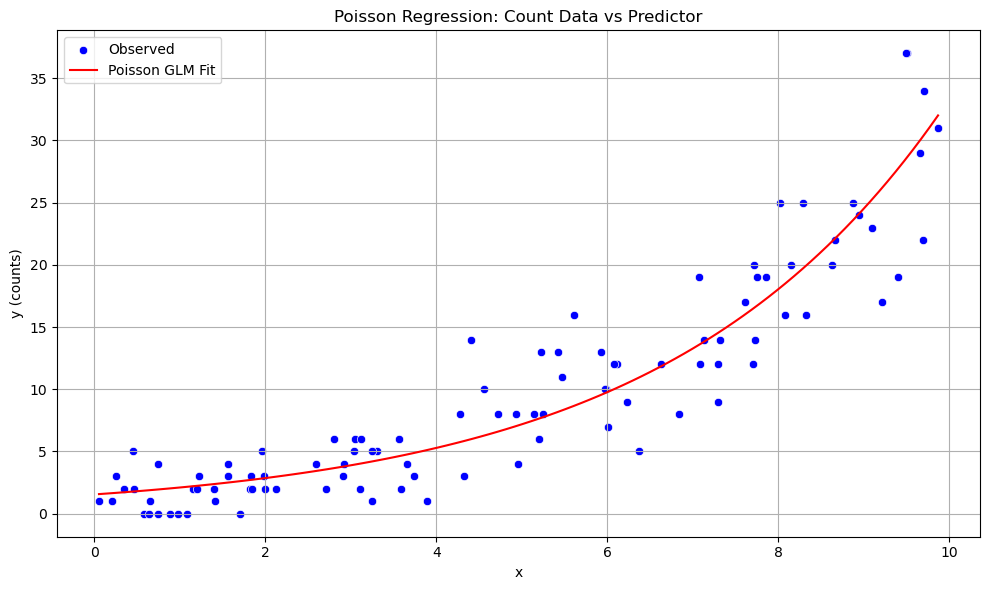

(None,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                  Generalized Linear Model Regression Results                  
 Dep. Variable:                      y   No. Observations:                  100
 Model:                            GLM   Df Residuals:                       98
 Model Family:                 Poisson   Df Model:                            1
 Link Function:                    Log   Scale:                          1.0000
 Method:                          IRLS   Log-Likelihood:                -237.82
 Date:                Tue, 27 May 2025   Deviance:                       121.35
 Time:                        07:14:40   Pearson chi2:                     110.
 No. Iterations:                     5   Pseudo R-squ. (CS):             0.9988
 Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 --------------------------------------------------------------

In [12]:
# Plot actual vs predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', data=df, label='Observed', color='blue')
sns.lineplot(x='x', y='y_pred', data=df_pred, label='Poisson GLM Fit', color='red')
plt.title('Poisson Regression: Count Data vs Predictor')
plt.xlabel('x')
plt.ylabel('y (counts)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot and model summary
plt.show(), result.summary()

In [26]:
# Re-import necessary libraries due to code execution state reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Simulate a more realistic dataset for Poisson regression
# Scenario: Predict number of daily traffic police visits based on traffic volume

np.random.seed(123)

# Simulate 150 days of data
days = 150
traffic_volume = np.random.normal(loc=300, scale=50, size=days)  # Average daily vehicle count
weather_index = np.random.uniform(0, 1, size=days)  # 0 = bad weather, 1 = perfect weather
is_weekend = np.random.choice([0, 1], size=days, p=[0.7, 0.3])  # 30% weekends

# Generate expected visits using a log-linear model
# Example model: log(λ) = β0 + β1 * traffic + β2 * weather + β3 * weekend
# We'll use some reasonable parameters
log_lambda = (
    0.1 +
    0.005 * traffic_volume + 
    0.8 * weather_index + 
    0.5 * is_weekend
)
lambda_ = np.exp(log_lambda)
visits = np.random.poisson(lam=lambda_)


In [27]:
# Create a DataFrame
df_real = pd.DataFrame({
    'visits': visits,
    'traffic_volume': traffic_volume,
    'weather_index': weather_index,
    'is_weekend': is_weekend
})
df_real

,visits,traffic_volume,weather_index,is_weekend
0,11,245.718470,0.859389,1
1,14,349.867272,0.821504,0
2,14,314.148925,0.909872,0
3,4,224.685264,0.128631,0
4,4,271.069987,0.081780,0
...,...,...,...,...
145,9,289.395994,0.948252,0
146,5,322.813545,0.556035,0
147,18,377.227223,0.500561,0
148,5,288.016561,0.003532,0


In [30]:

# Fit Poisson GLM
real_model = smf.glm(
    formula='visits ~ traffic_volume + weather_index + is_weekend',
    data=df_real,
    family=sm.families.Poisson()
).fit()
print(real_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 visits   No. Observations:                  150
Model:                            GLM   Df Residuals:                      146
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -376.86
Date:                Tue, 20 May 2025   Deviance:                       173.16
Time:                        21:24:27   Pearson chi2:                     166.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9269
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.1780      0.168     -1.

In [32]:
# Predict for visualization
traffic_range = np.linspace(df_real['traffic_volume'].min(), df_real['traffic_volume'].max(), 100)
weather_mean = df_real['weather_index'].mean()
weekend = 0  # Weekday for plot

df_pred_real = pd.DataFrame({
    'traffic_volume': traffic_range,
    'weather_index': weather_mean,
    'is_weekend': weekend
})
df_pred_real['predicted_visits'] = real_model.predict(df_pred_real)
df_pred_real

,traffic_volume,weather_index,is_weekend,predicted_visits
0,160.070545,0.478165,0,3.133592
1,162.796248,0.478165,0,3.183024
2,165.521952,0.478165,0,3.233236
3,168.247655,0.478165,0,3.284240
4,170.973359,0.478165,0,3.336048
...,...,...,...,...
95,419.012382,0.478165,0,13.861189
96,421.738086,0.478165,0,14.079847
97,424.463789,0.478165,0,14.301954
98,427.189493,0.478165,0,14.527565


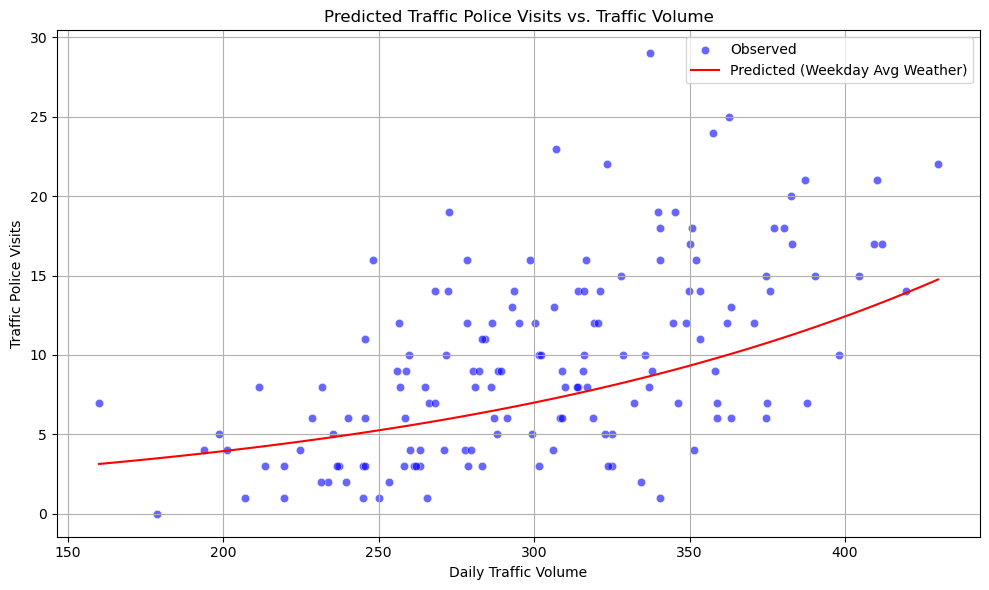

(None,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                  Generalized Linear Model Regression Results                  
 Dep. Variable:                 visits   No. Observations:                  150
 Model:                            GLM   Df Residuals:                      146
 Model Family:                 Poisson   Df Model:                            3
 Link Function:                    Log   Scale:                          1.0000
 Method:                          IRLS   Log-Likelihood:                -376.86
 Date:                Tue, 20 May 2025   Deviance:                       173.16
 Time:                        21:27:49   Pearson chi2:                     166.
 No. Iterations:                     4   Pseudo R-squ. (CS):             0.9269
 Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
 ----------------------------------------------------------

In [33]:
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='traffic_volume', y='visits', data=df_real, label='Observed', color='blue', alpha=0.6)
sns.lineplot(x='traffic_volume', y='predicted_visits', data=df_pred_real, label='Predicted (Weekday Avg Weather)', color='red')
plt.title('Predicted Traffic Police Visits vs. Traffic Volume')
plt.xlabel('Daily Traffic Volume')
plt.ylabel('Traffic Police Visits')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show plot and model summary
plt.show(), real_model.summary()
